In [ ]:
# Importing needed libraries
import torch
from torch import nn

In [ ]:
# setting up device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Getting the data (FoodMini based off Food 101)

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory already exists')
else:
  print(f'{image_path} directory does not exits, creating one...')
  image_path.mkdir(parents = True, exist_ok=True)

  with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

  with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping pizza, steak, sushi data...')
    zip_ref.extractall(image_path)

print('All steps completed successfully')

data/pizza_steak_sushi directory does not exits, creating one...
Unzipping pizza, steak, sushi data...
All steps completed successfully


- Data preparation and exploration

In [ ]:
import os

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [ ]:
# Setting up train and testing path
train_path = image_path / 'train'
test_path = image_path / 'test'
train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/sushi/2394442.jpg
Image class: sushi
Image heigh: 408
Image width: 512


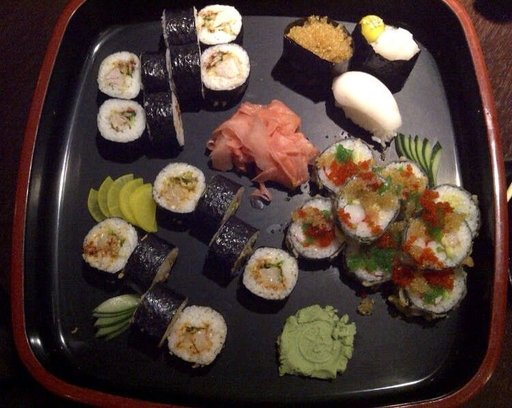

In [ ]:
# Visualizing an image
import random
from PIL import Image

#random.seed(42)

# 1. Getting all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image heigh: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 407.5, -0.5)

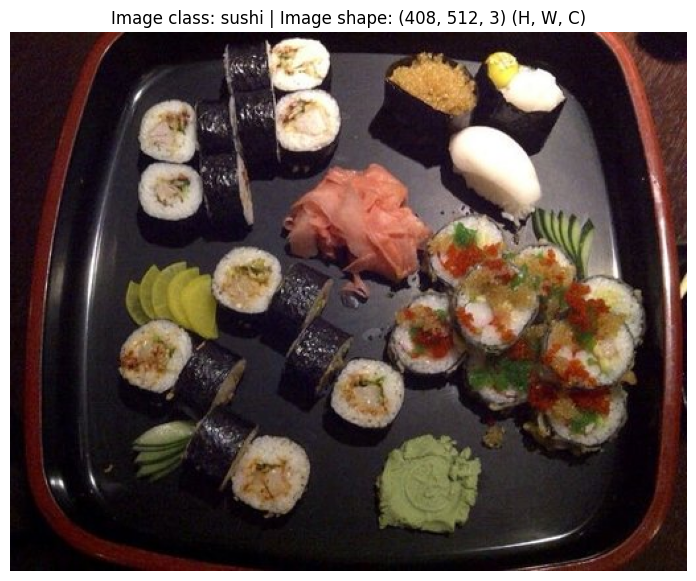

In [ ]:
# Visualizing using matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} (H, W, C)')
plt.axis(False)

In [ ]:
# Transforming data to tensors
# Then turn them into torch.utils.data.Dataset and then to torch.utils.data.DataLoader
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# First we define a way to transofrm our images
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)), # We want to first resize our images
    transforms.RandomHorizontalFlip(p = 0.5), # Randomly flip our images horizontally (as a way to augment data)
    transforms.ToTensor() # Finally transform them to tensors
])

In [ ]:
data_transform(img)

tensor([[[0.0824, 0.0824, 0.0863,  ..., 0.1412, 0.1373, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1412, 0.1373, 0.1255],
         [0.1137, 0.0980, 0.1059,  ..., 0.1333, 0.1412, 0.1294],
         ...,
         [0.1412, 0.1373, 0.1294,  ..., 0.0157, 0.0196, 0.0157],
         [0.1333, 0.1373, 0.1255,  ..., 0.0275, 0.0275, 0.0275],
         [0.1255, 0.1294, 0.1137,  ..., 0.0275, 0.0314, 0.0314]],

        [[0.0431, 0.0431, 0.0392,  ..., 0.0667, 0.0588, 0.0588],
         [0.0353, 0.0431, 0.0392,  ..., 0.0667, 0.0549, 0.0588],
         [0.0392, 0.0471, 0.0471,  ..., 0.0627, 0.0627, 0.0510],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.0078, 0.0078, 0.0039],
         [0.0667, 0.0706, 0.0706,  ..., 0.0118, 0.0118, 0.0118],
         [0.0667, 0.0667, 0.0667,  ..., 0.0196, 0.0157, 0.0118]],

        [[0.0745, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
         [0.0863, 0.0902, 0.0941,  ..., 0.0863, 0.0784, 0.0784],
         [0.1137, 0.1059, 0.0941,  ..., 0.0941, 0.0863, 0.

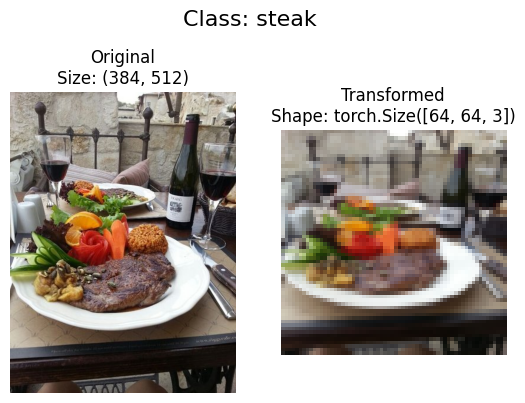

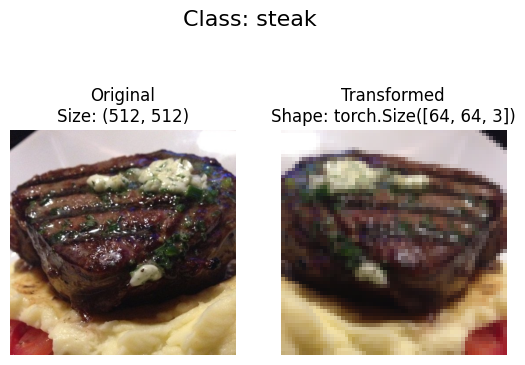

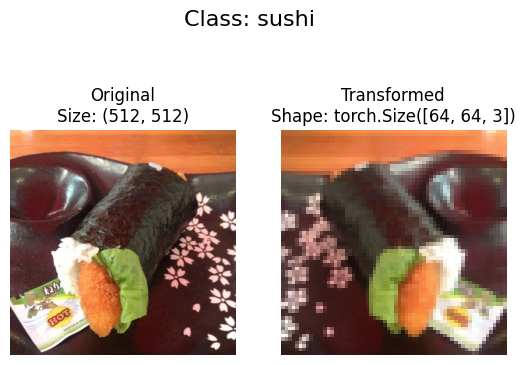

In [ ]:
# Plotting transformed images
def plot_transformed_imgs(image_paths: list, transform, n = 3, seed = None):
  """Selects random images from a path and loads / transforms them
  then plots the original vs. the transformed image"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      transformed_img = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f'Transformed\nShape: {transformed_img.shape}')
      ax[1].axis(False)

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)

plot_transformed_imgs(image_path_list, data_transform, 3, 42)

# Turning our data into an image database with ImageFolder

In [ ]:
# Now we will load all our data and transform them using torchvision.datasets.ImageFolder
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform, # transform data
                                  target_transform=None) # transform labels

test_data = datasets.ImageFolder(root = test_path,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Class names
class_names = train_data.classes
class_names, class_names[0]

(['pizza', 'steak', 'sushi'], 'pizza')

In [ ]:
#class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Visualizing data from train_data
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [ ]:
print(f'Image Tensor: {img}')
print(f'Image shape: {img.shape}')
print(f'Image data type: {img.dtype}')
print(f'Image label {label}')
print(f'Image class: {class_names[label]}')

Image Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original image shape: torch.Size([3, 64, 64]) -> [C,H,W]
Permuted image shape: torch.Size([64, 64, 3]) -> [H,W,C]


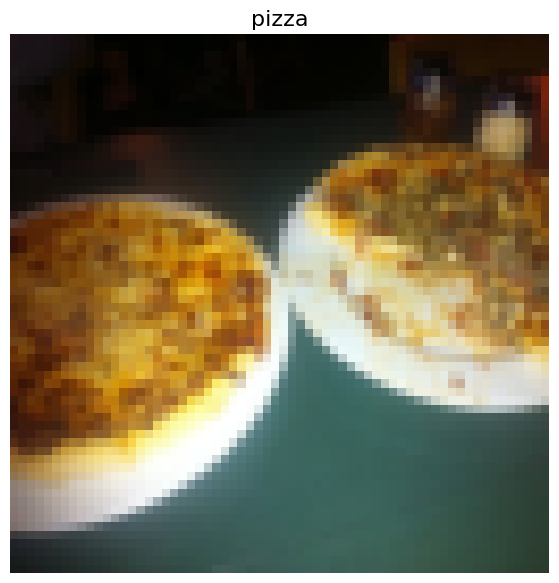

In [ ]:
# Visualizing our image
img_permute = img.permute(1,2,0)
print(f'Original image shape: {img.shape} -> [C,H,W]')
print(f'Permuted image shape: {img_permute.shape} -> [H,W,C]')

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize = 16);

In [ ]:
# Turning our dataset into batches
import torchvision
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1, # How many subprocesses to use for data loading. 0 means that the data will be loaded in the main process
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))
print(f'Image shape: {img.shape} -> [B, C, H, W]')

Image shape: torch.Size([1, 3, 64, 64]) -> [B, C, H, W]


# Replicating the functionality of ImageFolder with a custom function using 'Dataset'

In [ ]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# First we want to able to retrieve the above list and dictionary from our target directory
# Something similar to this
target_directory = train_path
print(f'Target dir: {target_directory}')

# Get the class names from directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
# So let's put them into a function
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Find the classes of folder names in the target directory"""
  # Getting class names
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Checking whether the directory has classes
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}. Please check file structure.")

  # Creating a dict of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Now to create a custom 'dataset' to replicate ImageFolder
# 1. subclass torch.utils.data.Dataset
# 2. Init our subclass with a target dirctory and a transform
# 3. Create several attributes
# 4. Create a function to load an image
# 5. Override the __len__() method
# 6. Override __getitem__() methods

In [ ]:
from torch.utils.data import Dataset

# 1. Subclassing Dataset
class ImageFolderCustom(Dataset):

  # 2. Init our subclass with a target directory and a transform
  def __init__(self, targ_dir: str, transform = None) -> None:

    # 3. Creating the attributes
    # Image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    # Setup transform
    self.transform = transform

    # Create class and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Function to load an image
  def load_img(self, index:int) -> Image.Image:
    """Opens and image via a path and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overriding __len__() to get the length of our dataset
  def __len__(self) -> int:
    """Returns total number of samples in dataset"""
    return len(self.paths)

  # 6. Overriding __getitem()__ (Necessary)
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data and label (X, y)"""
    img = self.load_img(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # Returns transformed data and label (X,y)
    else:
      return img, class_idx # Returns original data and label

In [ ]:
# Let's test our class, first we construct a transform
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir = train_path,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_path,
                                      transform = test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e28f9fb7e50>,
 <__main__.ImageFolderCustom at 0x7e28f9fb78e0>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Check for equality between ImageFolder and ImageFolderCustom
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


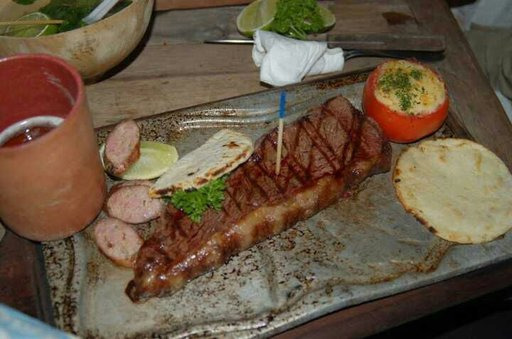

In [ ]:
train_data_custom.load_img(0)

In [ ]:
cutom_img, custom_label = train_data_custom[0]
cutom_img, custom_label

(tensor([[[0.3451, 0.3804, 0.3843,  ..., 0.2392, 0.4235, 0.5137],
          [0.3255, 0.3686, 0.3765,  ..., 0.4000, 0.4196, 0.4706],
          [0.3294, 0.3529, 0.3765,  ..., 0.4000, 0.4196, 0.4314],
          ...,
          [0.0471, 0.0471, 0.0549,  ..., 0.5176, 0.4902, 0.4353],
          [0.0431, 0.0471, 0.0549,  ..., 0.4863, 0.4706, 0.5412],
          [0.0431, 0.0510, 0.0549,  ..., 0.4510, 0.4941, 0.6353]],
 
         [[0.3922, 0.4275, 0.4314,  ..., 0.2588, 0.3686, 0.4392],
          [0.3725, 0.4157, 0.4235,  ..., 0.3608, 0.3725, 0.4118],
          [0.3765, 0.3961, 0.4235,  ..., 0.3569, 0.3686, 0.3765],
          ...,
          [0.0471, 0.0471, 0.0549,  ..., 0.6353, 0.6235, 0.5843],
          [0.0431, 0.0471, 0.0549,  ..., 0.6275, 0.6078, 0.6471],
          [0.0431, 0.0510, 0.0549,  ..., 0.6275, 0.6392, 0.7176]],
 
         [[0.3922, 0.4275, 0.4314,  ..., 0.1020, 0.2275, 0.2980],
          [0.3725, 0.4157, 0.4235,  ..., 0.2157, 0.2392, 0.2902],
          [0.3725, 0.4000, 0.4235,  ...,

In [ ]:
# Create a fucntion to display random images
# 1. Create a function to take in the dataset as well as other parameters
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 5,
                          display_shape: bool = True,
                          seed: int = None):

  # 2. Cap the number of diplayed images to 10
  if n > 5:
    n = 5
    display_shape = False
    print(f"For display purposes, n should not be larger than 5, setting it to 5")

  # 3. Setting random seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k = n)

  # 5. Setup plot
  plt.figure(figsize = (16,8))

  # 6. Loop through the random indexes and plot them
  for i, targ_sample in enumerate(random_samples_idx):
    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Rearranging tensor dimenstions
    targ_img_adjust = targ_img.permute(1,2,0)

    # Plotting adjusted sample
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis(False)
    if classes:
      title = f'Class: {classes[targ_label]}'
      if display_shape:
        title = title + f'\nShape: {targ_img_adjust.shape}'
    plt.title(title)

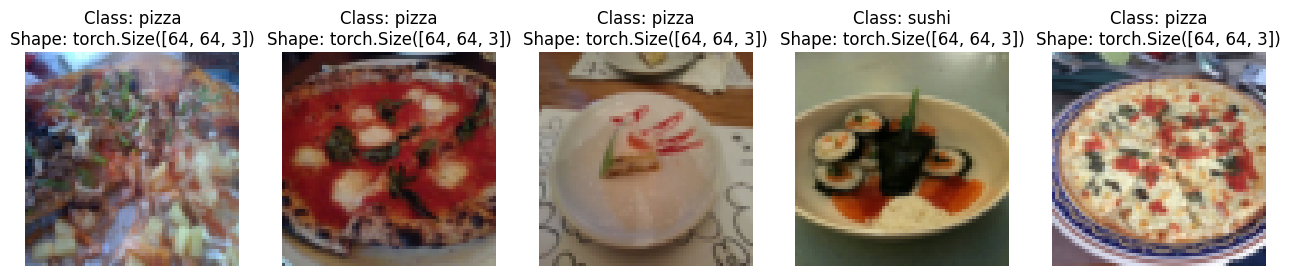

In [ ]:
# Now to compare functionalities
# First on ImageFolder dataset
display_random_images(train_data,
                      n = 5,
                      classes = class_names,
                      seed = None)

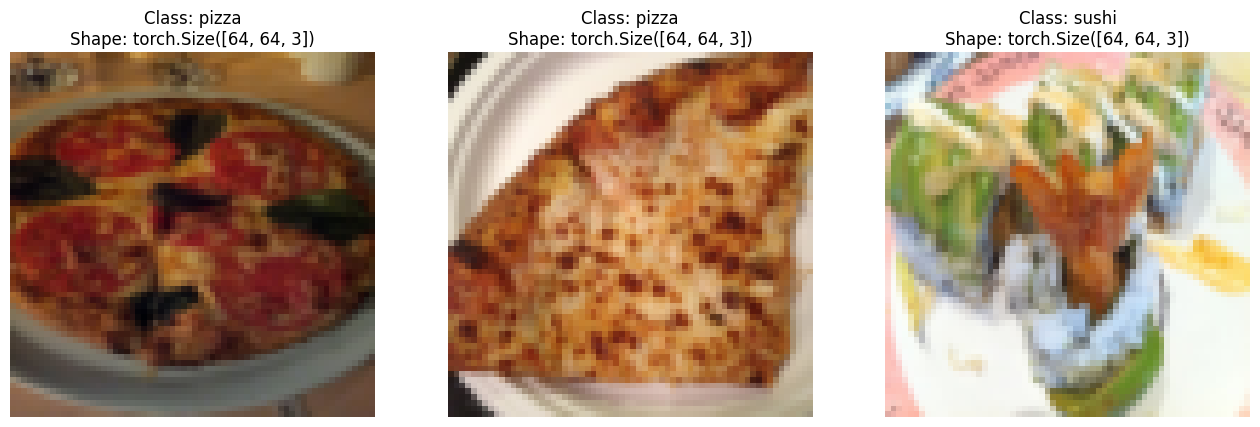

In [ ]:
# Now on our custom ImageFolderCustom
display_random_images(train_data_custom,
                      n=3,
                      classes = class_names,
                      seed = None)

In [ ]:
# Turning our data into DataLoader (batchify)
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader_custom = DataLoader(train_data_custom,
                                      batch_size = BATCH_SIZE,
                                      shuffle = True,
                                      num_workers=0)

test_dataloader_custom = DataLoader(test_data_custom,
                                      batch_size = BATCH_SIZE,
                                      shuffle = False,
                                      num_workers=0)

In [ ]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e28f9f00940>,
 <torch.utils.data.dataloader.DataLoader at 0x7e28f9f01630>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

- State of the art data augmentation methods (TrivialAugment)

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31), # How strong this augmentation, max = 31
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
train_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ToTensor()
)

In [ ]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1937872.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/165639.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/914570.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2707522.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3857508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2254705.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg')]

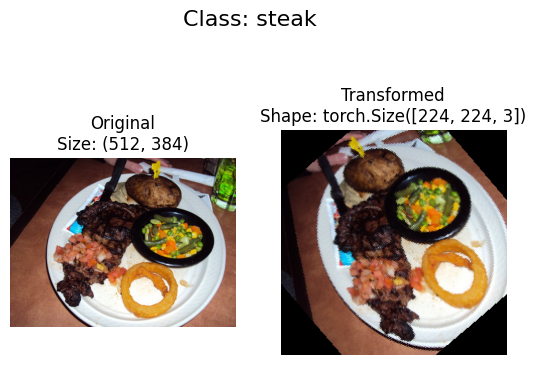

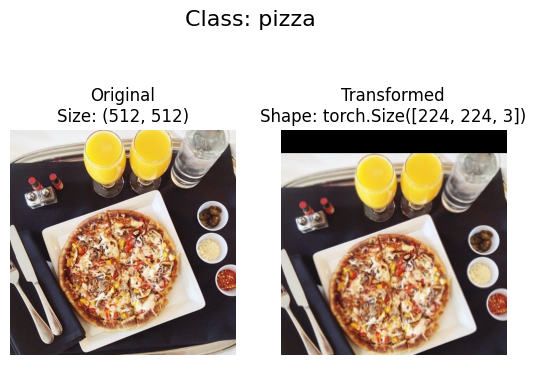

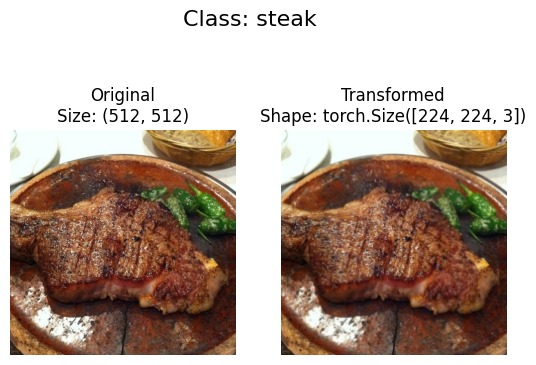

In [ ]:
# Plot random transformed images
plot_transformed_imgs(image_paths=image_path_list,
                      transform=train_transforms,
                      n = 3,
                      seed = None)

# Building the baseline model

In [ ]:
# Creating our basic transform
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

In [ ]:
# Getting our custom data using ImageFolder
train_data_simple = datasets.ImageFolder(train_path,
                                  transform=simple_transform)

test_data_simple = datasets.ImageFolder(test_path,
                                  transform=simple_transform)

In [ ]:
# Turning our data into batches
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(train_data_simple,
                              shuffle = True,
                              batch_size = BATCH_SIZE,
                              num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                              shuffle = False,
                              batch_size = BATCH_SIZE,
                              num_workers=NUM_WORKERS)

In [ ]:
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7e28fa1256f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e28fa125db0>)

In [ ]:
# Buidling our baseline model based off TinyVGG
class TinyVGGModel0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2) # By default, the stride = kernel size in the MaxPool2d
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.output_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*169, out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.output_layer(x)
    #print(x.shape)
    return x
    #  return self.output_layer(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGGModel0(3, 10, 3).to(device)

model_0

TinyVGGModel0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Doing a dummy forward pass through our model to get the shape of our output layer
img_batch, label_batch = next(iter(train_dataloader_simple))

In [ ]:
dummy_pred = model_0(img_batch)

In [ ]:
dummy_pred

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

- Using 'torchinfo' to get a comprehensive look at a model

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel0                            [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
# Creating an optimizer and a loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr = 0.1, params = model_0.parameters())

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# Creating training and testing functions
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        acc = accuracy_fn(y, y_pred.argmax(dim = 1))
        train_acc += acc

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            acc = accuracy_fn(y, test_pred_logits.argmax(dim = 1))
            test_acc += acc

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           accuracy_fn = accuracy_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} %| "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f} %"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGGModel0(input_shape=3,
                  hidden_units=10,
                  output_shape=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 30.4688 %| test_loss: 1.0983 | test_acc: 30.1136 %
Epoch: 2 | train_loss: 1.0998 | train_acc: 32.8125 %| test_loss: 1.0697 | test_acc: 54.1667 %
Epoch: 3 | train_loss: 1.0869 | train_acc: 48.8281 %| test_loss: 1.0808 | test_acc: 49.2424 %
Epoch: 4 | train_loss: 1.0842 | train_acc: 39.8438 %| test_loss: 1.0608 | test_acc: 58.3333 %
Epoch: 5 | train_loss: 1.0662 | train_acc: 41.4062 %| test_loss: 1.0654 | test_acc: 56.4394 %
Epoch: 6 | train_loss: 1.0305 | train_acc: 43.3594 %| test_loss: 1.0139 | test_acc: 54.2614 %
Epoch: 7 | train_loss: 0.9854 | train_acc: 42.1875 %| test_loss: 0.9323 | test_acc: 59.3750 %
Epoch: 8 | train_loss: 0.9663 | train_acc: 57.8125 %| test_loss: 0.9987 | test_acc: 44.3182 %
Epoch: 9 | train_loss: 0.9238 | train_acc: 59.7656 %| test_loss: 1.0670 | test_acc: 33.2386 %
Epoch: 10 | train_loss: 0.9969 | train_acc: 46.4844 %| test_loss: 1.0631 | test_acc: 40.4356 %
Total training time: 31.908 seconds


- Plotting the loss curves

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

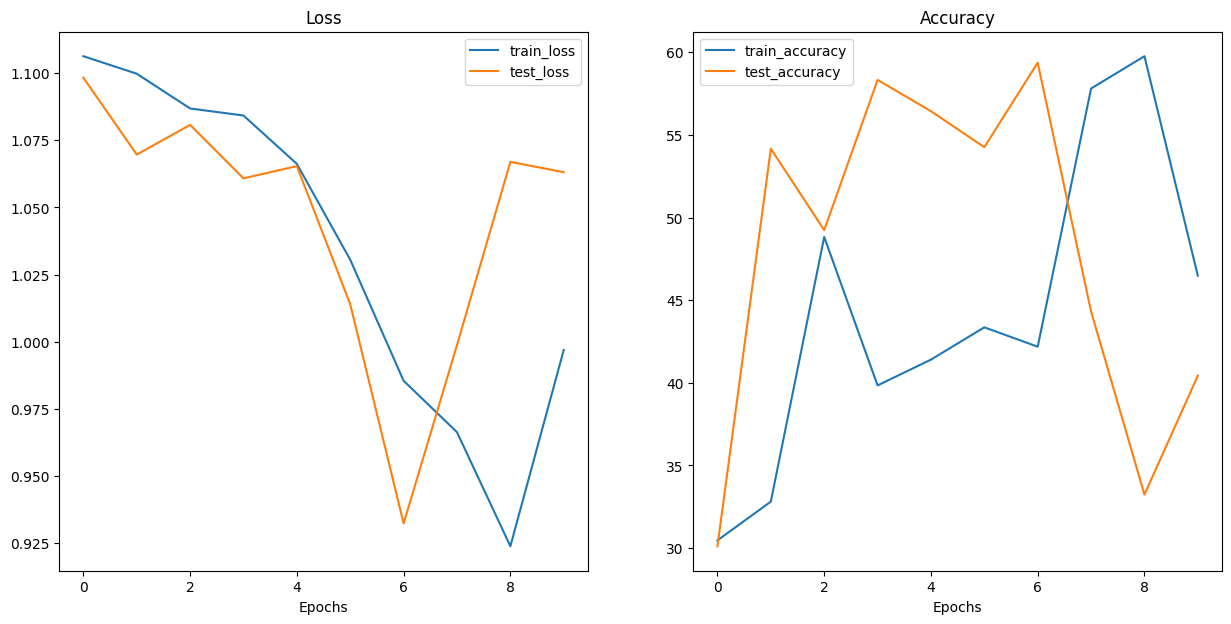

In [ ]:
plot_loss_curves(model_0_results)

# Building the second model with Data Augmentation

In [ ]:
# Creating a transform with data augmentation
train_transform_trivial = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [ ]:
# Create train and test data, and dataloaders with these transforms
train_data_augmented = datasets.ImageFolder(train_path, train_transform_trivial)
test_data_simple = datasets.ImageFolder(test_path, test_transform_simple)

In [ ]:
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                              batch_size = 32,
                              shuffle = True,
                              num_workers = os.cpu_count())

test_dataloader_simple = DataLoader(test_data_simple,
                              batch_size = 32,
                              shuffle = False,
                              num_workers = os.cpu_count())

In [ ]:
# Creating the new model
model_1 = TinyVGGModel0(3,10,3).to(device)
model_1

TinyVGGModel0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Creating a loss function and optimizer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr = 0.001, params = model_1.parameters())

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model_1, train_dataloader_augmented,
                        test_dataloader_simple, optimizer,
                        loss_fn, NUM_EPOCHS)

end_time = timer()
print(f'Total train time = {end_time - start_time} seconds')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1049 | train_acc: 25.0000 %| test_loss: 1.1019 | test_acc: 26.0417 %
Epoch: 2 | train_loss: 1.0807 | train_acc: 42.5781 %| test_loss: 1.1261 | test_acc: 26.0417 %
Epoch: 3 | train_loss: 1.0712 | train_acc: 42.5781 %| test_loss: 1.1593 | test_acc: 26.0417 %
Epoch: 4 | train_loss: 1.1253 | train_acc: 30.4688 %| test_loss: 1.1581 | test_acc: 26.0417 %
Epoch: 5 | train_loss: 1.0865 | train_acc: 42.5781 %| test_loss: 1.1554 | test_acc: 33.3333 %
Epoch: 6 | train_loss: 1.0856 | train_acc: 38.2812 %| test_loss: 1.1433 | test_acc: 28.1250 %
Epoch: 7 | train_loss: 1.0665 | train_acc: 50.0000 %| test_loss: 1.1278 | test_acc: 29.1667 %
Epoch: 8 | train_loss: 1.0811 | train_acc: 34.7656 %| test_loss: 1.1105 | test_acc: 30.2083 %
Epoch: 9 | train_loss: 1.0834 | train_acc: 42.1875 %| test_loss: 1.1017 | test_acc: 32.2917 %
Epoch: 10 | train_loss: 1.0075 | train_acc: 54.6875 %| test_loss: 0.9900 | test_acc: 48.3902 %
Total train time = 33.84188343199992 seconds


In [ ]:
model_1_results

{'train_loss': [1.1049142181873322,
  1.0806865319609642,
  1.0711720064282417,
  1.125308871269226,
  1.0865341275930405,
  1.085640549659729,
  1.066476121544838,
  1.0810574442148209,
  1.0833658128976822,
  1.007543794810772],
 'train_acc': [25.0,
  42.578125,
  42.578125,
  30.46875,
  42.578125,
  38.28125,
  50.0,
  34.765625,
  42.1875,
  54.6875],
 'test_loss': [1.1019279956817627,
  1.1260557969411213,
  1.159274419148763,
  1.1580669283866882,
  1.1554276545842488,
  1.1432735323905945,
  1.1278329690297444,
  1.1105122168858845,
  1.1017192006111145,
  0.9900376598040262],
 'test_acc': [26.041666666666668,
  26.041666666666668,
  26.041666666666668,
  26.041666666666668,
  33.333333333333336,
  28.125,
  29.166666666666668,
  30.208333333333332,
  32.291666666666664,
  48.39015151515151]}

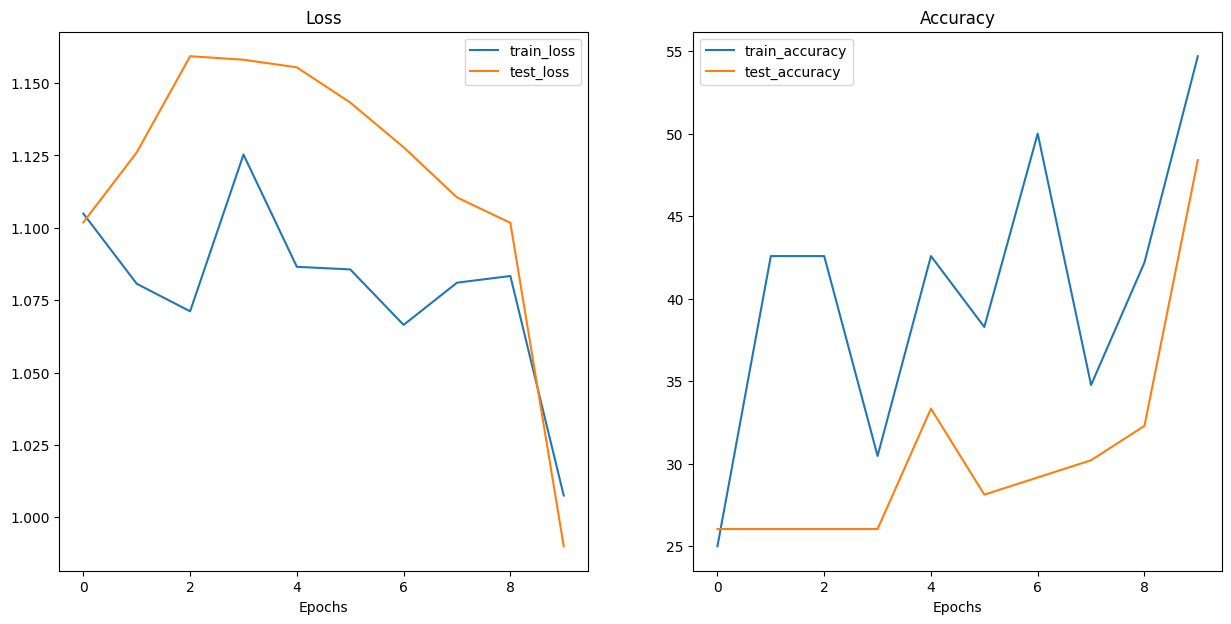

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
# Comparing our model results
# There many tools (we'll use hardcoding)
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [ ]:
model_0_df

train_loss  train_acc  test_loss   test_acc
0    1.106319  30.468750   1.098321  30.113636
1    1.099806  32.812500   1.069690  54.166667
2    1.086854  48.828125   1.080757  49.242424
3    1.084233  39.843750   1.060832  58.333333
4    1.066216  41.406250   1.065396  56.439394
5    1.030505  43.359375   1.013929  54.261364
6    0.985437  42.187500   0.932304  59.375000
7    0.966291  57.812500   0.998739  44.318182
8    0.923817  59.765625   1.066961  33.238636
9    0.996901  46.484375   1.063138  40.435606

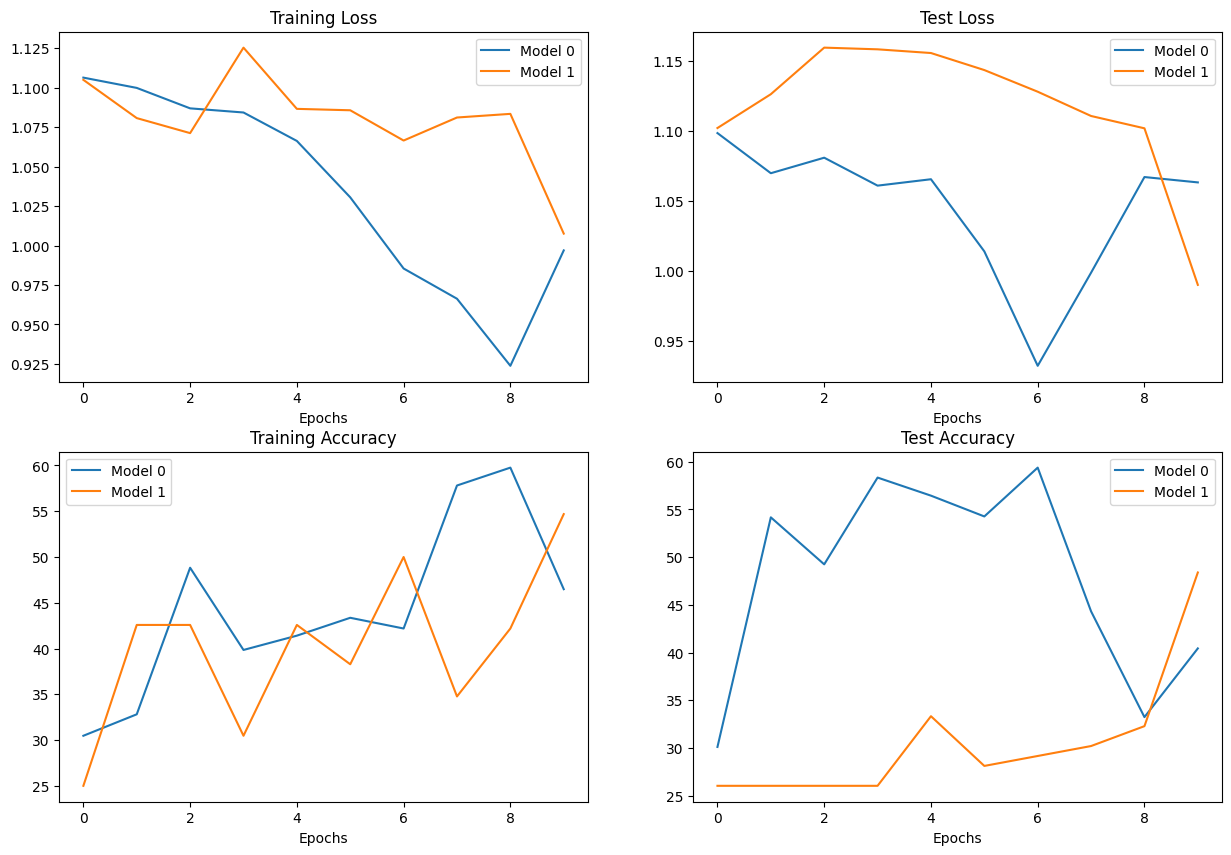

In [ ]:
plt.figure(figsize = (15,10))

epochs = range(len(model_0_df))

# Train loss plot
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label = 'Model 0')
plt.plot(epochs, model_1_df['train_loss'], label = 'Model 1')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.legend()

# Test loss plot
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label = 'Model 0')
plt.plot(epochs, model_1_df['test_loss'], label = 'Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

# Train accuracy plot
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label = 'Model 0')
plt.plot(epochs, model_1_df['train_acc'], label = 'Model 1')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Test accuracy plot
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label = 'Model 0')
plt.plot(epochs, model_1_df['test_acc'], label = 'Model 1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Making a prediction on a custom image

In [ ]:
# Downloading a custom image programmatically
import requests

custom_image_path = data_path / '04-pizza-dad.jpeg'

if not custom_image_path.is_file():
  with open(custom_image_path, 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg')
    print(f'Downloading {custom_image_path}...')
    f.write(request.content)
else:
  print(f'{custom_image_path} already exists')

In [ ]:
# Now we need to make our custom image in the same format as what our model was trained on
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f'Custom image tensor: \n{custom_image_uint8}')
print(f'Custom image shape: {custom_image_uint8.shape}')
print(f'Custom image dtype: {custom_image_uint8.dtype}')

Custom image tensor: 
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image dtyp

(-0.5, 3023.5, 4031.5, -0.5)

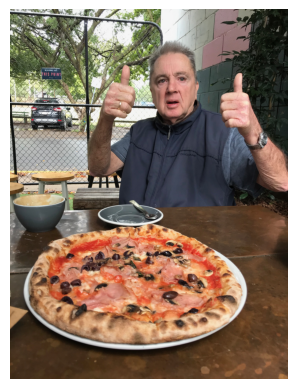

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [ ]:
# We'll need to make our image be in the correct shape (3,64,64) and data type (float32)
custom_image = custom_image_uint8.float() / 255 # Dividing our image pixel values by 255, to make the values range between 0 and 1

In [ ]:
custom_image, custom_image.dtype

(tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
          [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
          [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
          ...,
          [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
          [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
          [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],
 
         [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
          [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
          [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
          ...,
          [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
          [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
          [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],
 
         [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
          [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
          [0.3412, 0.4353, 0.5333,  ...,

In [ ]:
# Creating a transform pipline for our imgae
custom_image_transform = transforms.Compose([
    transforms.Resize(size = (64,64), antialias=True),
])

In [ ]:
# Transofrming image
custom_image_transformed = custom_image_transform(custom_image)

print(f'Original shape: {custom_image.shape}')
print(f'Transformed shape: {custom_image_transformed.shape}')

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


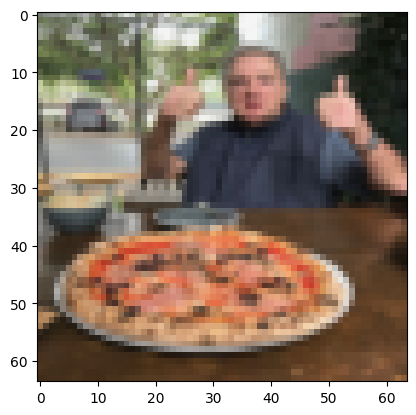

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
# Now trying to make predictions
# First we need to add the batch dimension
custom_image_transformed_batched = custom_image_transformed.unsqueeze(0)

model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed_batched.to(device)) # Need to send to device

In [ ]:
custom_image_pred

tensor([[ 0.0427, -0.2868, -0.0782]])

In [ ]:
torch.softmax(custom_image_pred, dim = 1).argmax(dim = 1)

tensor([0])

In [ ]:
class_names[torch.softmax(custom_image_pred, dim = 1).argmax(dim = 1)]

'pizza'

In [ ]:
# Functionising the prediction procedure

def predict_custom_image(model: torch.nn.Module,
                         path: str,
                         classes: List[str] = None,
                         transform = None,
                         device = device):
  """ Predicts the class of a custom image and plots it"""

  custom_image = torchvision.io.read_image(str(path)).float() / 255

  if transform:
    custom_image = transform(custom_image)

  custom_image = custom_image.unsqueeze(0)

  model.eval()
  with torch.inference_mode():
    prediction_logits = model(custom_image.to(device))
    prediction_probs = torch.softmax(prediction_logits, dim = 1)
    prediction_labels = prediction_probs.argmax(dim = 1)

  plt.imshow(custom_image.squeeze(0).permute(1,2,0))
  plt.axis(False)
  if classes:
    title = f"Prediction: {classes[prediction_labels.cpu()]} | Probability: {prediction_probs.max():.4f}"
  else:
    title = f'Prediction: {prediction_labels} | Probability: {prediction_probs.max():.4f}'
  plt.title(title);

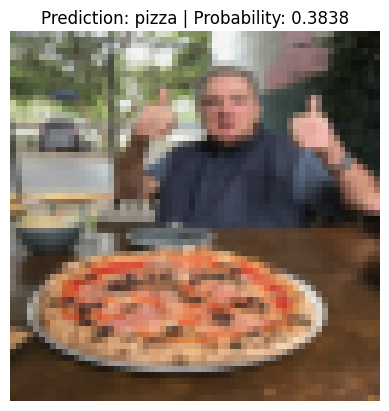

In [ ]:
predict_custom_image(model_1, custom_image_path, class_names, custom_image_transform, device)

# Exercises

In [ ]:
import requests
import zipfile
from pathlib import Path

# setting up main directories
data_path = Path("exercise_data/")
images_path = data_path / "pizza_steak_sushi_20_percent"

# Checking whether the images directory exists and creating it if it does not exist
if images_path.is_dir():
    print(f"{images_path} directory exists.")
else:
    print(f"Could not find {images_path} directory, creating one...")
    images_path.mkdir(parents=True, exist_ok=True)

    # Downloading the MiniFood zip file
    with open(data_path / "pizza_steak_sushi_20_percent.zip", 'wb') as f:
      request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip')
      print(f'Downloading the pizza_steak_sushi_20_percent zip file to {data_path}')
      f.write(request.content)

    # Unzipping the MiniFood dataset
    with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", 'r') as zip_file:
      print('Unzipping the pizza_steak_sushi_20_percent.zip file')
      zip_file.extractall(images_path)

Did not find exercise_data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping the pizza_steak_sushi.zip file


In [ ]:
# Creating the train and test directories
train_dir = images_path / 'train'
test_dir = images_path / 'test'
train_dir, test_dir

(PosixPath('exercise_data/pizza_steak_sushi_20_percent/train'),
 PosixPath('exercise_data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Device-agnostic code
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Check the dataset directory tree
import os

for dirpath, dirnames, filenames in os.walk(images_path):
  print(len(dirpath), len(dirnames), (len(filenames)))

42 2 0
48 3 0
54 0 150
54 0 154
54 0 146
47 3 0
53 0 46
53 0 46
53 0 58


Image: exercise_data/pizza_steak_sushi_20_percent/test/sushi/2819945.jpg
Image height: 512
Image width: 289
Image class: sushi


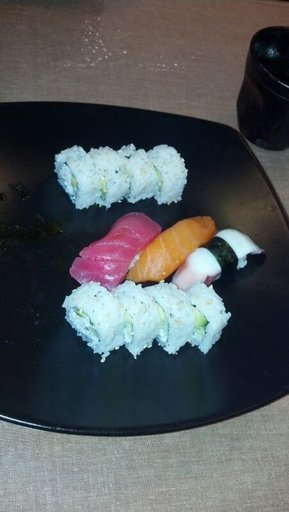

In [ ]:
# Visualizing an image from our images_path
from PIL import Image
import random

image_list = list(images_path.glob('*/*/*.jpg'))
random_img = random.choice(image_list)
random_img_class = random_img.parent.stem
img = Image.open(random_img)

print(f'Image: {random_img}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
print(f'Image class: {random_img_class}')
img

In [ ]:
# Creating the train and test data transforms
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import v2

train_transform = v2.Compose([
    v2.Resize(size = (128,128), antialias = True),
    v2.TrivialAugmentWide(),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

test_transform = v2.Compose([
    v2.Resize(size = (128,128), antialias = True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

In [ ]:
train_transform

Compose(
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      TrivialAugmentWide(interpolation=InterpolationMode.NEAREST, num_magnitude_bins=31)
      ToImage()
      ToDtype(scale=True)
)

In [ ]:
# Turning our folders into datasets
train_data = ImageFolder(train_dir, train_transform, target_transform = None)
test_data = ImageFolder(test_dir, test_transform)

In [ ]:
len(train_data), len(test_data)

(450, 150)

In [ ]:
# Turning our datasets into DataLoaders
train_dataloader = DataLoader(train_data, batch_size = 32, shuffle = True, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_data, batch_size = 32, shuffle = False, num_workers=os.cpu_count())

In [ ]:
# Creating the baseline model
class TinyVGGModel(nn.Module):
  """Class for creating a model based off the TinyVGG model"""
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.output_classification = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*32*32, out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x)
    # x = self.conv_block_2(x)
    # print(x)
    # x = self.output_classification(x)
    # print(x)
    return self.output_classification(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
model_0 = TinyVGGModel(3,20,3).to(device)
model_0

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=20480, out_features=3, bias=True)
  )
)

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[-0.0192, -0.0043,  0.0211]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3272, 0.3321, 0.3407]], device='cuda:0')

Output prediction label:
tensor([2], device='cuda:0')

Actual label:
0


In [ ]:
# Creating the training and testing functions
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):

  """Do a forward train step"""

  if device:
    model.to(device)

  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)
    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_loss += loss

    train_acc += ((torch.eq(y, torch.softmax(y_logits, dim = 1).argmax(dim = 1)).sum()) / len(y_logits)) * 100

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc


def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data,
               loss_fn: torch.nn.Module,
               device = device):

  """Do a forward test step"""

  if device:
    model.to(device)

  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_logits = model(X)
      loss = loss_fn(y_logits, y)
      test_loss += loss

      test_acc += ((torch.eq(y, torch.softmax(y_logits, dim = 1).argmax(dim = 1)).sum()) / len(y_logits)) * 100

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

In [ ]:
# Defining a loss function and an optimizer, and training our model
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr = 0.001, params = model_0.parameters())

epochs = 20

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_step(model_0, train_dataloader, loss_fn, optimizer, device)
  test_loss, test_acc = test_step(model_0, test_dataloader, loss_fn, device)

  print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f} % | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f} %')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1040 | Train Accuracy: 36.25 % | Test Loss: 1.0265 | Test Accuracy: 49.60 %
Epoch: 1 | Train Loss: 1.0349 | Train Accuracy: 43.13 % | Test Loss: 0.9584 | Test Accuracy: 48.30 %
Epoch: 2 | Train Loss: 1.0146 | Train Accuracy: 47.08 % | Test Loss: 0.9151 | Test Accuracy: 55.97 %
Epoch: 3 | Train Loss: 0.9161 | Train Accuracy: 60.00 % | Test Loss: 0.9688 | Test Accuracy: 53.35 %
Epoch: 4 | Train Loss: 0.9518 | Train Accuracy: 53.13 % | Test Loss: 0.8972 | Test Accuracy: 61.59 %
Epoch: 5 | Train Loss: 0.8952 | Train Accuracy: 56.88 % | Test Loss: 0.8864 | Test Accuracy: 65.06 %
Epoch: 6 | Train Loss: 0.8656 | Train Accuracy: 60.42 % | Test Loss: 0.8993 | Test Accuracy: 59.60 %
Epoch: 7 | Train Loss: 0.8736 | Train Accuracy: 58.33 % | Test Loss: 0.8505 | Test Accuracy: 66.25 %
Epoch: 8 | Train Loss: 0.8406 | Train Accuracy: 62.08 % | Test Loss: 0.8789 | Test Accuracy: 61.99 %
Epoch: 9 | Train Loss: 0.8626 | Train Accuracy: 62.92 % | Test Loss: 0.8659 | Test Accuracy

Training results:
 - **50 Epochs, 10 Hidden Units, Standard Dataset:**
  - Train Loss: 0.3969 | Train Accuracy: 86.33% | Test Loss: 1.7402 | Test Accuracy: 40.44 %
 - **20 Epochs, 20 Hidden Units, Standard Dataset:**
  - Train Loss: 0.7927 | Train Accuracy: 65.62 % | Test Loss: 1.1557 | Test Accuracy: 43.47 %
 - **20 Epochs, 20 Hidden Units, Double-size Dataset:**
  - Train Loss: 0.5148 | Train Accuracy: 78.12 % | Test Loss: 0.9399 | Test Accuracy: 64.72 %

In [ ]:
class_names = train_data.classes
class_idx = train_data.class_to_idx
class_names, class_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# Making prediction on a custom image
custom_image_path = data_path / 'sushi_img.jpg'

custom_img_uint8 = torchvision.io.read_image(str(custom_image_path)).float() / 255

custom_image_transform = v2.Compose([
    v2.Resize(size = (128,128), antialias = True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

custom_image_transformed = custom_image_transform(custom_img_uint8)
custom_image_transformed_batched = custom_image_transformed.unsqueeze(dim = 0)
custom_image_transformed_batched = custom_image_transformed_batched.to(device)

model_0.eval()
with torch.inference_mode():
  prediction_logits = model_0(custom_image_transformed_batched)
prediction_probs = torch.softmax(prediction_logits, dim = 1)
prediction_label = prediction_probs.argmax(dim = 1)

print(f'Image in {custom_image_path} was predicted to be "{class_names[prediction_label]}" with a prediction probability of {prediction_probs.max() * 100:.3f} %')

Image in exercise_data/sushi_img.jpg was predicted to be "sushi" with a prediction probability of 87.304 %


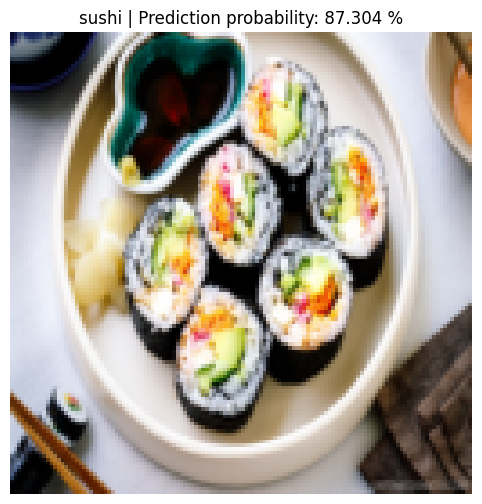

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.imshow(custom_image_transformed.permute(1,2,0))
plt.axis(False)
title = f'{class_names[prediction_label]} | Prediction probability: {prediction_probs.max() * 100:.3f} %'
plt.title(title);